In [22]:
import pycaret
import pandas as pd

In [23]:
# อ่านไฟล์ CSV
data = pd.read_csv('../export_data/filtered_data_3_best.csv')

In [24]:
# ตั้ง 'timestamp' เป็น index หากยังไม่ได้ทำ
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# ตั้งค่า freq ให้กับ index
data = data.asfreq('D')  # 'D' สำหรับรายวัน

In [25]:
data.tail()

,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
timestamp,,,,,
2025-02-07 07:00:00,70.933952,34.743259,29.321219,26.166471,28.271927
2025-02-08 07:00:00,69.348548,30.654249,26.000000,22.380675,28.385596
2025-02-09 07:00:00,69.916384,28.971065,24.616898,20.976852,28.373742
2025-02-10 07:00:00,71.226336,30.652667,25.856981,22.374574,28.251201
2025-02-11 07:00:00,68.159624,32.532955,27.522727,24.120455,28.693799


In [26]:
# แสดงแถวที่มีค่าหายไปก่อนเติม
print("แถวที่มีค่าหายไปก่อนเติม:")
print(data[data.isnull().any(axis=1)])

# เติมค่าที่หายไปด้วยการ interpolate แบบเส้นตรง
data.interpolate(method='linear', inplace=True)

# แสดงแถวที่ยังมีค่า NaN หลังจากเติม (ถ้ามี)
missing_rows_after = data[data.isnull().any(axis=1)]
if not missing_rows_after.empty:
    print("แถวที่ยังมีค่าหายไปหลังเติม:")
    print(missing_rows_after)
else:
    print("ไม่มีค่าหายไปแล้ว")


row = data.loc["2023-09-30 07:00:00"]
row

แถวที่มีค่าหายไปก่อนเติม:
                     humidity  pm_10  pm_2_5  pm_2_5_sp  temperature
timestamp                                                           
2023-09-30 07:00:00       NaN    NaN     NaN        NaN          NaN
ไม่มีค่าหายไปแล้ว


humidity       82.889367
pm_10          60.525519
pm_2_5         53.415241
pm_2_5_sp      69.527667
temperature    29.219760
Name: 2023-09-30 07:00:00, dtype: float64

In [27]:
data = data[['pm_2_5']]

In [28]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data["day_of_week"] = data.index.dayofweek  # 0 = Monday, 6 = Sunday
data["week_of_year"] = data.index.isocalendar().week  # ค่าจะเป็น int64

In [29]:
# สมมติว่า data มี index เป็น datetime อยู่แล้ว
def assign_season(month):
    if month in [2, 3, 4]:  # ก.พ. - เม.ย.
        return "summer"        # ฤดูร้อน
    elif month in [5, 6, 7]:  # พ.ค. - ก.ค.
        return "early_rainy"   # ต้นฤดูฝน
    else:  # ส.ค. - ม.ค.
        return "late_rainy"    # ปลายฤดูฝน

season_mapping = {'summer': 0, 'early_rainy': 1, 'late_rainy': 2}
data["season"] = data.index.month.map(assign_season)
data['season'] = data['season'].map(season_mapping)

In [30]:
data["is_weekend"] = data.index.dayofweek.isin([5, 6]).astype(int)

In [31]:
import pandas as pd
import numpy as np

# สมมุติว่ามี DataFrame data ที่มีข้อมูลอยู่แล้ว
# เพิ่มฟีเจอร์ day_of_year
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data['day_of_year'] = data['date'].dt.dayofyear

# เพิ่มฟีเจอร์ month_sin และ month_cos
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

# เพิ่มฟีเจอร์ day_of_week_sin และ day_of_week_cos
data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)

lag_size = 30
for i in range(1,lag_size+1):
    data[f'pm_2_5_lag_{i}'] = data['pm_2_5'].shift(i)

In [32]:
data.columns

Index(['pm_2_5', 'year', 'month', 'day', 'day_of_week', 'week_of_year',
       'season', 'is_weekend', 'date', 'day_of_year', 'month_sin', 'month_cos',
       'day_of_week_sin', 'day_of_week_cos', 'pm_2_5_lag_1', 'pm_2_5_lag_2',
       'pm_2_5_lag_3', 'pm_2_5_lag_4', 'pm_2_5_lag_5', 'pm_2_5_lag_6',
       'pm_2_5_lag_7', 'pm_2_5_lag_8', 'pm_2_5_lag_9', 'pm_2_5_lag_10',
       'pm_2_5_lag_11', 'pm_2_5_lag_12', 'pm_2_5_lag_13', 'pm_2_5_lag_14',
       'pm_2_5_lag_15', 'pm_2_5_lag_16', 'pm_2_5_lag_17', 'pm_2_5_lag_18',
       'pm_2_5_lag_19', 'pm_2_5_lag_20', 'pm_2_5_lag_21', 'pm_2_5_lag_22',
       'pm_2_5_lag_23', 'pm_2_5_lag_24', 'pm_2_5_lag_25', 'pm_2_5_lag_26',
       'pm_2_5_lag_27', 'pm_2_5_lag_28', 'pm_2_5_lag_29', 'pm_2_5_lag_30'],
      dtype='object')

In [33]:
data_filtered = data.loc['2023-09':]  # ดึงข้อมูลตั้งแต่กันยายน 2023 เป็นต้นไป

<Axes: xlabel='timestamp'>

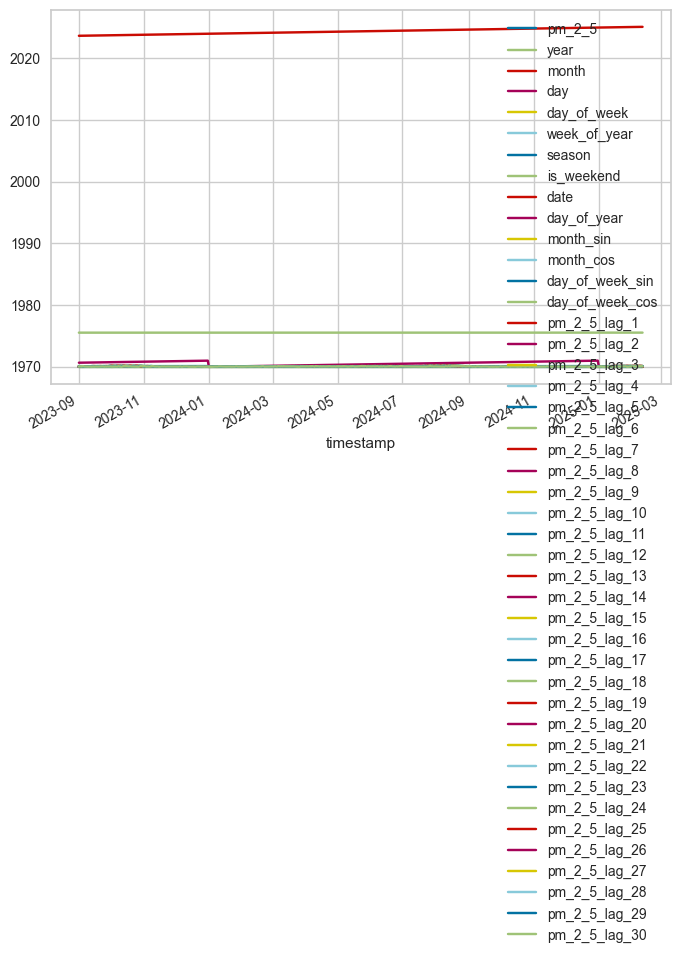

In [34]:
data_filtered.plot()

In [35]:
# สมมติว่า data มีจำนวนวันทั้งหมด
total_data = len(data_filtered)

# จำนวนวันที่ต้องการเป็น test data
test_days = 30

# คำนวณสัดส่วนของ 30 วันในข้อมูลทั้งหมด
test_size = test_days / total_data
test_size

0.05660377358490566

In [36]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_filtered, test_size=test_size, shuffle=False)

In [37]:
train_data.shape

(500, 44)

In [38]:
test_data.shape

(30, 44)

In [39]:
test_data.head(1)

,pm_2_5,year,month,day,day_of_week,week_of_year,season,is_weekend,date,day_of_year,...,pm_2_5_lag_21,pm_2_5_lag_22,pm_2_5_lag_23,pm_2_5_lag_24,pm_2_5_lag_25,pm_2_5_lag_26,pm_2_5_lag_27,pm_2_5_lag_28,pm_2_5_lag_29,pm_2_5_lag_30
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-13 07:00:00,42.594631,2025,1,13,0,3,2,0,2025-01-13,13,...,29.235626,21.650161,17.382743,13.847098,16.493088,14.572545,3.617925,3.025287,9.330097,16.010753


In [40]:
test_data.tail(1)

,pm_2_5,year,month,day,day_of_week,week_of_year,season,is_weekend,date,day_of_year,...,pm_2_5_lag_21,pm_2_5_lag_22,pm_2_5_lag_23,pm_2_5_lag_24,pm_2_5_lag_25,pm_2_5_lag_26,pm_2_5_lag_27,pm_2_5_lag_28,pm_2_5_lag_29,pm_2_5_lag_30
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-11 07:00:00,27.522727,2025,2,11,1,7,0,0,2025-02-11,42,...,21.406285,40.245154,31.798226,16.22314,14.060993,45.747352,42.430233,51.460606,42.594631,34.02521


In [41]:
test_data.tail()

,pm_2_5,year,month,day,day_of_week,week_of_year,season,is_weekend,date,day_of_year,...,pm_2_5_lag_21,pm_2_5_lag_22,pm_2_5_lag_23,pm_2_5_lag_24,pm_2_5_lag_25,pm_2_5_lag_26,pm_2_5_lag_27,pm_2_5_lag_28,pm_2_5_lag_29,pm_2_5_lag_30
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-02-07 07:00:00,29.321219,2025,2,7,4,6,0,0,2025-02-07,38,...,14.060993,45.747352,42.430233,51.460606,42.594631,34.025210,40.511737,37.291228,33.810780,35.536756
2025-02-08 07:00:00,26.000000,2025,2,8,5,6,0,1,2025-02-08,39,...,16.223140,14.060993,45.747352,42.430233,51.460606,42.594631,34.025210,40.511737,37.291228,33.810780
2025-02-09 07:00:00,24.616898,2025,2,9,6,6,0,1,2025-02-09,40,...,31.798226,16.223140,14.060993,45.747352,42.430233,51.460606,42.594631,34.025210,40.511737,37.291228
2025-02-10 07:00:00,25.856981,2025,2,10,0,7,0,0,2025-02-10,41,...,40.245154,31.798226,16.223140,14.060993,45.747352,42.430233,51.460606,42.594631,34.025210,40.511737
2025-02-11 07:00:00,27.522727,2025,2,11,1,7,0,0,2025-02-11,42,...,21.406285,40.245154,31.798226,16.223140,14.060993,45.747352,42.430233,51.460606,42.594631,34.025210


In [42]:
test_data.columns

Index(['pm_2_5', 'year', 'month', 'day', 'day_of_week', 'week_of_year',
       'season', 'is_weekend', 'date', 'day_of_year', 'month_sin', 'month_cos',
       'day_of_week_sin', 'day_of_week_cos', 'pm_2_5_lag_1', 'pm_2_5_lag_2',
       'pm_2_5_lag_3', 'pm_2_5_lag_4', 'pm_2_5_lag_5', 'pm_2_5_lag_6',
       'pm_2_5_lag_7', 'pm_2_5_lag_8', 'pm_2_5_lag_9', 'pm_2_5_lag_10',
       'pm_2_5_lag_11', 'pm_2_5_lag_12', 'pm_2_5_lag_13', 'pm_2_5_lag_14',
       'pm_2_5_lag_15', 'pm_2_5_lag_16', 'pm_2_5_lag_17', 'pm_2_5_lag_18',
       'pm_2_5_lag_19', 'pm_2_5_lag_20', 'pm_2_5_lag_21', 'pm_2_5_lag_22',
       'pm_2_5_lag_23', 'pm_2_5_lag_24', 'pm_2_5_lag_25', 'pm_2_5_lag_26',
       'pm_2_5_lag_27', 'pm_2_5_lag_28', 'pm_2_5_lag_29', 'pm_2_5_lag_30'],
      dtype='object')

In [43]:
# from pycaret.time_series import *
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
exp1.setup(data=train_data, target='pm_2_5', session_id=123)

# fold=12, iterative_imputation_iters=100, remove_outliers = True

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(500, 44)"
4,Transformed data shape,"(500, 46)"
5,Transformed train set shape,"(350, 46)"
6,Transformed test set shape,"(150, 46)"
7,Numeric features,42
8,Date features,1
9,Preprocess,True


In [44]:
# compare baseline models
best = exp1.compare_models(n_select=15)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,5.0518,44.7408,6.6120,0.5213,0.3479,0.3244,0.0070
llar,Lasso Least Angle Regression,5.0867,44.6743,6.6077,0.5205,0.3455,0.3248,0.0070
lasso,Lasso Regression,5.0961,44.7563,6.6137,0.5193,0.3462,0.3261,0.1490
br,Bayesian Ridge,5.1501,45.1115,6.6368,0.5166,0.3492,0.3329,0.0070
en,Elastic Net,5.1243,45.2219,6.6501,0.5122,0.3493,0.3285,0.0090
et,Extra Trees Regressor,5.3827,47.9133,6.8298,0.4978,0.3573,0.3470,0.0500
huber,Huber Regressor,5.2411,46.8517,6.7750,0.4938,0.3517,0.3225,0.0100
ridge,Ridge Regression,5.2347,46.9830,6.7734,0.4929,0.3560,0.3308,0.0070
lightgbm,Light Gradient Boosting Machine,5.3875,48.4979,6.8865,0.4799,0.3561,0.3397,0.0470
rf,Random Forest Regressor,5.3409,48.8302,6.9260,0.4797,0.3610,0.3493,0.0910


In [45]:
# model_1 = exp1.create_model('rf')
model_1 = exp1.create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4980,36.0937,6.0078,0.6646,0.3332,0.3090
1,6.3820,78.3652,8.8524,0.5216,0.4162,0.3996
2,4.5480,28.2023,5.3106,0.7158,0.3243,0.3409
3,4.6695,41.3244,6.4284,0.4055,0.3329,0.2525
4,5.7229,60.5728,7.7829,0.4358,0.3962,0.3953
5,5.4806,48.1665,6.9402,0.3614,0.3600,0.3514
6,5.5775,44.4513,6.6672,0.6256,0.3577,0.3657
7,4.5761,32.4325,5.6950,0.3908,0.3095,0.2726
8,4.0830,32.8045,5.7275,0.7183,0.2701,0.2200


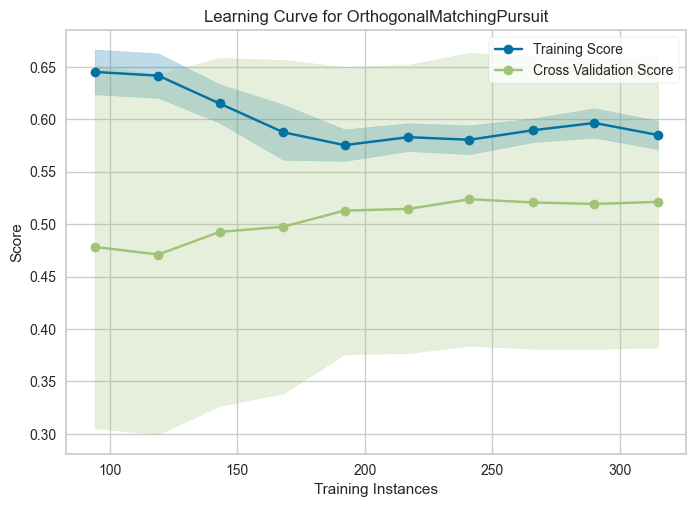

In [46]:
exp1.plot_model(model_1, 'learning')

In [31]:
# exp1.evaluate_model(model_1)

In [47]:
model_2 = exp1.create_model('llar')
model_3 = exp1.create_model('lasso')
model_4 = exp1.create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.6047,34.7415,5.8942,0.6772,0.3251,0.3106
1,6.5355,77.8289,8.8221,0.5249,0.4094,0.4016
2,4.7524,32.9014,5.7360,0.6684,0.3388,0.3511
3,4.7330,42.9392,6.5528,0.3823,0.3288,0.2519
4,5.7993,61.0750,7.8151,0.4312,0.4083,0.4110
5,5.3472,45.0854,6.7146,0.4022,0.3323,0.3227
6,5.5537,44.9973,6.7080,0.6210,0.3538,0.3635
7,4.7445,32.9542,5.7406,0.3810,0.3168,0.2776
8,3.7715,28.1655,5.3071,0.7581,0.2565,0.2086


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.6048,34.7412,5.8942,0.6772,0.3251,0.3106
1,6.5363,77.7991,8.8204,0.5251,0.4096,0.4019
2,4.7524,32.9024,5.7361,0.6684,0.3388,0.3511
3,4.7329,42.9400,6.5529,0.3822,0.3288,0.2519
4,5.7992,61.0745,7.8150,0.4312,0.4083,0.4110
5,5.3472,45.0842,6.7145,0.4023,0.3323,0.3228
6,5.5539,44.9980,6.7081,0.6210,0.3538,0.3635
7,4.7444,32.9523,5.7404,0.3810,0.3167,0.2776
8,3.7715,28.1644,5.3070,0.7581,0.2565,0.2086


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5507,35.1901,5.9321,0.6730,0.3204,0.3039
1,6.8344,80.9342,8.9963,0.5060,0.4235,0.4312
2,4.8329,34.6044,5.8825,0.6513,0.3454,0.3564
3,4.8328,42.8751,6.5479,0.3832,0.3284,0.2534
4,5.9321,62.2056,7.8871,0.4206,0.4218,0.4333
5,5.2431,43.6619,6.6077,0.4211,0.3229,0.3134
6,5.4572,42.9458,6.5533,0.6383,0.3501,0.3603
7,4.7817,33.8914,5.8216,0.3634,0.3279,0.2847
8,3.8125,28.2814,5.3180,0.7571,0.2536,0.2123


In [48]:
new_data = test_data.copy().drop(['pm_2_5'], axis=1)
predictions = exp1.predict_model(model_1, data=new_data)
predictions.head()

,year,month,day,day_of_week,week_of_year,season,is_weekend,date,day_of_year,month_sin,...,pm_2_5_lag_22,pm_2_5_lag_23,pm_2_5_lag_24,pm_2_5_lag_25,pm_2_5_lag_26,pm_2_5_lag_27,pm_2_5_lag_28,pm_2_5_lag_29,pm_2_5_lag_30,prediction_label
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-13 07:00:00,2025,1,13,0,3,2,0,2025-01-13,13,0.5,...,21.650162,17.382744,13.847098,16.493088,14.572545,3.617924,3.025287,9.330097,16.010754,31.011239
2025-01-14 07:00:00,2025,1,14,1,3,2,0,2025-01-14,14,0.5,...,29.235626,21.650162,17.382744,13.847098,16.493088,14.572545,3.617924,3.025287,9.330097,36.049170
2025-01-15 07:00:00,2025,1,15,2,3,2,0,2025-01-15,15,0.5,...,29.046980,29.235626,21.650162,17.382744,13.847098,16.493088,14.572545,3.617924,3.025287,44.807888
2025-01-16 07:00:00,2025,1,16,3,3,2,0,2025-01-16,16,0.5,...,25.877863,29.046980,29.235626,21.650162,17.382744,13.847098,16.493088,14.572545,3.617924,39.509174
2025-01-17 07:00:00,2025,1,17,4,3,2,0,2025-01-17,17,0.5,...,25.487585,25.877863,29.046980,29.235626,21.650162,17.382744,13.847098,16.493088,14.572545,41.833760


In [49]:
predict_v = predictions['prediction_label']
predict_v.head()

timestamp
2025-01-13 07:00:00    31.011239
2025-01-14 07:00:00    36.049170
2025-01-15 07:00:00    44.807888
2025-01-16 07:00:00    39.509174
2025-01-17 07:00:00    41.833760
Freq: D, Name: prediction_label, dtype: float64

In [50]:
real = test_data['pm_2_5']
# real.head(7)

# ทำนาย 1 วันข้างหน้า ต้องทำนายเผื่อ 2 วัน

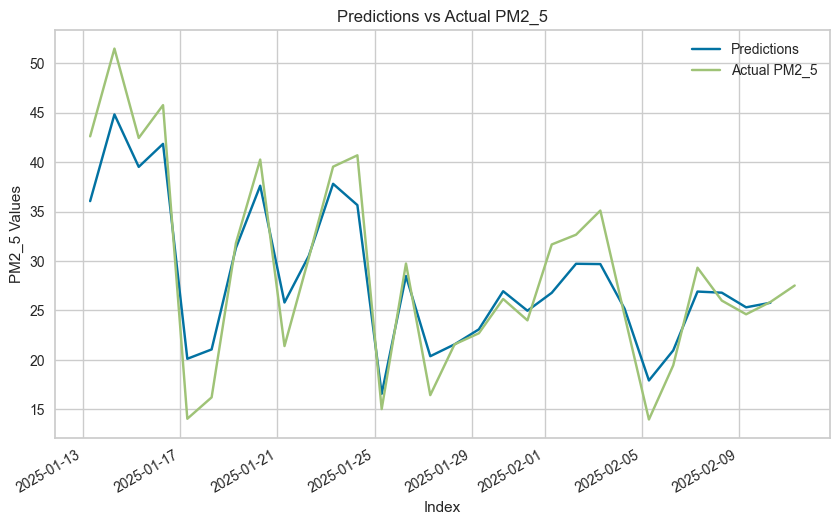

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# สมมุติว่า result คือ DataFrame ที่รวม predictions กับ pm_10
result = pd.concat([predict_v.shift(-1), test_data['pm_2_5']], axis=1)
result.columns = ['Predictions', 'Actual PM2_5']  # ตั้งชื่อคอลัมน์

# พล็อตข้อมูล
result.plot(figsize=(10, 6))

# ตั้งชื่อกราฟ
plt.title('Predictions vs Actual PM2_5')
plt.xlabel('Index')
plt.ylabel('PM2_5 Values')

# แสดงกราฟ
plt.show()

In [55]:
from pycaret.regression import *
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual values and predicted values
y_true = test_data["pm_2_5"][:"2025-2-10"]
y_pred = predict_v.shift(-1).dropna(axis=0)

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R² Score: 0.8844
Mean Absolute Error (MAE): 2.6792
Root Mean Squared Error (RMSE): 3.3946
Mean Absolute Percentage Error (MAPE): 10.45%
Accuracy: 89.55%


# Predict 1 by 1

In [70]:
data_compare = data_filtered.loc[:'2025-01-12']
result = pd.DataFrame()

start_date = "2025-01-13"
end_date = "2025-02-11"

model = model_1

for date in pd.date_range(start=start_date, end=end_date, freq="D"):
    # Drop columns
    test_1 = data_filtered
    # ดึงวันนี้มา
    test_1 = test_1.loc[str(date.date())]

    # ใส่เข้าไป
    data_compare = pd.concat([data_compare, test_1], axis=0)

    for i in range(1,lag_size+1):
        data_compare[f'pm_2_5_lag_{i}'] = data_compare['pm_2_5'].shift(i)

    # ดึง
    test_1 = (data_compare.loc[str(date.date())]).drop(columns=['pm_2_5'])
    
    # Drop ทิ้งล่าสุดใน data_compare
    data_compare = data_compare.drop(data_compare.last_valid_index())
    test_1 = test_1[~test_1.index.duplicated(keep='last')]

    # Predict
    predict_test_1 = exp1.predict_model(model, data=test_1)

    # เพิ่มผลทำนายเข้าไปใน data_compare
    data_compare = pd.concat([data_compare, predict_test_1], axis=0)

    # แทนที่ค่าในคอลัมน์ 'pm_2_5' ในวันที่ '2025-01-13' ด้วยค่าในคอลัมน์ 'prediction_label'
    data_compare.loc[str(date.date()), 'pm_2_5'] = data_compare.loc[str(date.date()), 'prediction_label']

    # ลบคอลัมน์ 'prediction_label' (หากต้องการแค่ผลทำนาย)
    data_compare = data_compare.drop(columns=['prediction_label'])

    # กรองเอาวันที่ซ้ำกัน (index ซ้ำ) ออกให้เหลือแค่ตัวเดียว
    data_compare = data_compare[~data_compare.index.duplicated(keep='last')]

    # บันทึกลง result
    result = pd.concat([result, predict_test_1], axis=0)

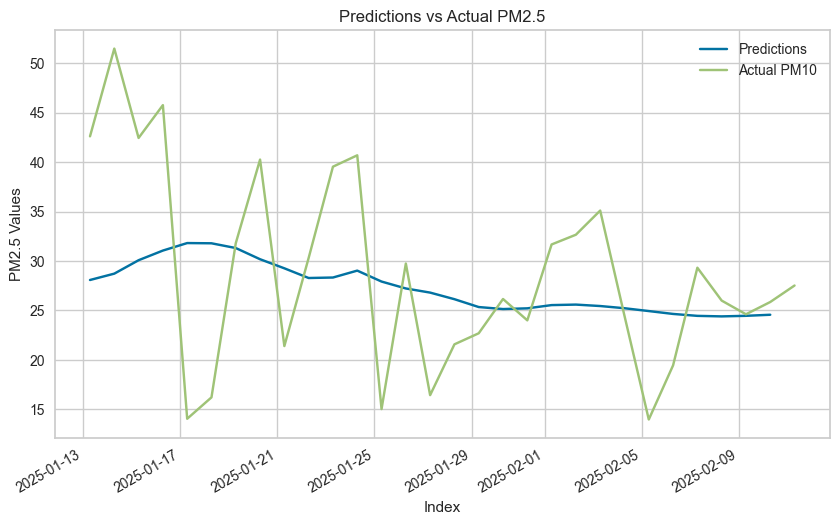

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = data_filtered.loc[start_date:end_date]
# สมมุติว่า result คือ DataFrame ที่รวม predictions กับ pm_10
result_plot = pd.concat([result['prediction_label'].shift(-1), real_data['pm_2_5']], axis=1)
result_plot.columns = ['Predictions', 'Actual PM10']  # ตั้งชื่อคอลัมน์

# พล็อตข้อมูล
result_plot.plot(figsize=(10, 6))

# ตั้งชื่อกราฟ
plt.title('Predictions vs Actual PM2.5')
plt.xlabel('Index')
plt.ylabel('PM2.5 Values')

# แสดงกราฟ
plt.show()

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate Regression Metrics
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calculate MAPE and Accuracy
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error
accuracy = 100 - mape  # Convert to Accuracy %

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

R² Score: -0.0023
Mean Absolute Error (MAE): 7.9369
Root Mean Squared Error (RMSE): 9.9942
Mean Absolute Percentage Error (MAPE): 32.09%
Accuracy: 67.91%
